1. Xem lại công thức tính node trong hidden layer, biếu diễn bài toán dưới dạng ma trận. Hiểu hết và chạy lại code (softmax, cross_entropy, batch update).

Giả sử có n điểm dữ liệu trong mỗi batch size, mỗi điểm dữ liệu có d feature:

$X = \begin{bmatrix}
x_1^{[1]} & x_2^{[1]} &...& x_d^{[1]}\\
x_1^{[2]} & x_2^{[2]} &...& x_d^{[2]}\\
... & ... &... & ...\\
x_1^{[n]} & x_2^{[n]} &...& x_d^{[n]}\\
\end{bmatrix}
$

Qua layer 1 ta được ma trận:

 $Z^{(1)} = \begin{bmatrix}
 -(z^{(1)[1]})^T-\\
 -(z^{(1)[2]})^T-\\
 ...\\
 -(z^{(1)[n]})^T-\\
 \end{bmatrix} = 
 \begin{bmatrix}
(x^{[1]}*W^{(1)} + (b^{(1)})^T\\
(x^{[2]}*W^{(1)} + (b^{(1)})^T\\
...\\
(x^{[n]}*W^{(1)} + (b^{(1)})^T\\
 \end{bmatrix} = X*W^{(1)} + (b^{(1)})^T$ (theo cơ chế broadcasting)

Tương tự như vậy lần lượt với các layer sau:

**Feedforward:**
$
A^{(1)} = \sigma(Z^{(1)})\\
Z^{(2)} = A^{(1)}*W^{(2)} + (b^{(2)})^T\\
A^{(2)} = \sigma(Z^{(2)})\\
Z^{(3)} = A^{(2)}*W^{(3)} + (b^{(3)})^T\\
\hat Y = A^{(3)} =\sigma(Z^{(3)}) 
$

In [ ]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt


In [ ]:
# data split
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = tts(X_train, y_train, test_size=0.15)
# print(X_val.shape)
print(X_train.shape)
print(y_train.shape)

(51000, 28, 28)
(51000,)


In [ ]:
X_train = X_train.astype('float32') # convert uint8 to float32
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
img_rows, img_cols = X_train[0].shape[0], X_train[0].shape[1]
# nomalize
X_train /= 255
X_val /= 255
X_test /= 255

In [ ]:
X_train = X_train.reshape(-1, 784) # flatten each image
X_test = X_test.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)

(10000, 784)
(51000, 784)
(51000,)


In [ ]:
batch_size = 128
numOfClass = 10
epoch = 20

In [ ]:
# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, numOfClass)
y_val = tf.keras.utils.to_categorical(y_val, numOfClass)
y_test = tf.keras.utils.to_categorical(y_test, numOfClass)
print(y_train.shape)
print(y_train[0])

(51000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# model
model = Sequential()
# input shape
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(numOfClass, activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_34 (Dense)             (None, 32)                16416     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                330       
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# define loss function
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [ ]:
# train model
H = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              verbose=1,
              validation_data=(X_test, y_test))

Epoch 1/20
399/399 [==============================] - 4s 9ms/step - loss: 1.1688 - accuracy: 0.7200 - val_loss: 0.5840 - val_accuracy: 0.8708
Epoch 2/20
399/399 [==============================] - 3s 9ms/step - loss: 0.4987 - accuracy: 0.8764 - val_loss: 0.3941 - val_accuracy: 0.9014
Epoch 3/20
399/399 [==============================] - 4s 9ms/step - loss: 0.3865 - accuracy: 0.8959 - val_loss: 0.3345 - val_accuracy: 0.9090
Epoch 4/20
399/399 [==============================] - 3s 9ms/step - loss: 0.3386 - accuracy: 0.9065 - val_loss: 0.3030 - val_accuracy: 0.9145
Epoch 5/20
399/399 [==============================] - 4s 9ms/step - loss: 0.3091 - accuracy: 0.9141 - val_loss: 0.2798 - val_accuracy: 0.9226
Epoch 6/20
399/399 [==============================] - 3s 8ms/step - loss: 0.2876 - accuracy: 0.9197 - val_loss: 0.2684 - val_accuracy: 0.9262
Epoch 7/20
399/399 [==============================] - 3s 9ms/step - loss: 0.2704 - accuracy: 0.9235 - val_loss: 0.2540 - val_accuracy: 0.9301
Epoch 

In [ ]:
# score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Test loss: 0.1619136929512024
Test accuracy 0.9526000022888184


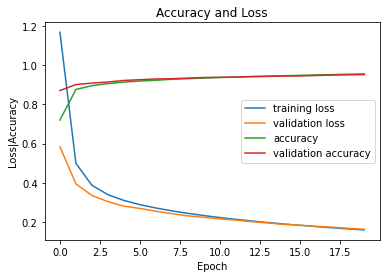

In [ ]:
# visualize
plt.plot(np.arange(0, epoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, epoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, epoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, epoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()
plt.show()

2. Chỉnh các hyperparameter: learning rate, activation function, số hidden layer, số node. Thử dùng các model đơn giản hơn (không có hidden layer, 1 hidden layer) hay phức tạp hơn (nhiều hidden layer và node hơn), vẽ loss function theo epoch tương ứng.

In [ ]:
# giữ nguyên model, chỉnh learning rate = 0.001
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
# train model
H = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              verbose=1,
              validation_data=(X_test, y_test))

Epoch 1/20
399/399 [==============================] - 4s 9ms/step - loss: 2.2280 - accuracy: 0.2220 - val_loss: 2.1018 - val_accuracy: 0.3754
Epoch 2/20
399/399 [==============================] - 4s 9ms/step - loss: 1.9919 - accuracy: 0.4497 - val_loss: 1.8587 - val_accuracy: 0.5132
Epoch 3/20
399/399 [==============================] - 3s 9ms/step - loss: 1.7314 - accuracy: 0.5578 - val_loss: 1.5807 - val_accuracy: 0.6057
Epoch 4/20
399/399 [==============================] - 4s 9ms/step - loss: 1.4630 - accuracy: 0.6523 - val_loss: 1.3242 - val_accuracy: 0.7019
Epoch 5/20
399/399 [==============================] - 3s 9ms/step - loss: 1.2315 - accuracy: 0.7332 - val_loss: 1.1135 - val_accuracy: 0.7689
Epoch 6/20
399/399 [==============================] - 3s 9ms/step - loss: 1.0487 - accuracy: 0.7807 - val_loss: 0.9537 - val_accuracy: 0.8051
Epoch 7/20
399/399 [==============================] - 3s 9ms/step - loss: 0.9113 - accuracy: 0.8086 - val_loss: 0.8347 - val_accuracy: 0.8276
Epoch 

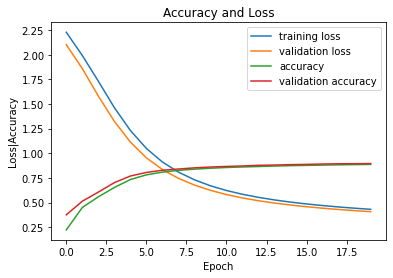

In [ ]:
# visualize
plt.plot(np.arange(0, epoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, epoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, epoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, epoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()
plt.show()

In [ ]:
# giữ nguyên model, chỉnh learning rate = 0.1
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1),
              metrics=['accuracy'])
# train model
H = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              verbose=1,
              validation_data=(X_test, y_test))

Epoch 1/20
399/399 [==============================] - 4s 9ms/step - loss: 0.4440 - accuracy: 0.8747 - val_loss: 0.2346 - val_accuracy: 0.9347
Epoch 2/20
399/399 [==============================] - 4s 9ms/step - loss: 0.2060 - accuracy: 0.9407 - val_loss: 0.1780 - val_accuracy: 0.9479
Epoch 3/20
399/399 [==============================] - 3s 9ms/step - loss: 0.1505 - accuracy: 0.9575 - val_loss: 0.1435 - val_accuracy: 0.9568
Epoch 4/20
399/399 [==============================] - 3s 9ms/step - loss: 0.1185 - accuracy: 0.9660 - val_loss: 0.1188 - val_accuracy: 0.9649
Epoch 5/20
399/399 [==============================] - 4s 9ms/step - loss: 0.0959 - accuracy: 0.9720 - val_loss: 0.1158 - val_accuracy: 0.9650
Epoch 6/20
399/399 [==============================] - 3s 9ms/step - loss: 0.0789 - accuracy: 0.9777 - val_loss: 0.0957 - val_accuracy: 0.9713
Epoch 7/20
399/399 [==============================] - 4s 9ms/step - loss: 0.0675 - accuracy: 0.9810 - val_loss: 0.0875 - val_accuracy: 0.9733
Epoch 

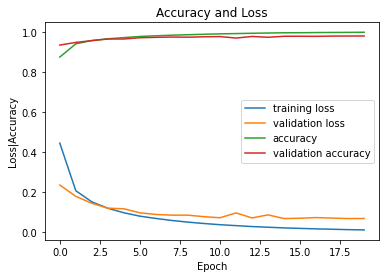

In [ ]:
# visualize
plt.plot(np.arange(0, epoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, epoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, epoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, epoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()
plt.show()

In [ ]:
# giữ nguyên layer , node, learning rate, thay đổi activation -> sigmoid:
model = Sequential()
# input shape
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(numOfClass, activation='softmax'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_40 (Dense)             (None, 32)                16416     
_________________________________________________________________
dense_41 (Dense)             (None, 10)                330       
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
399/399 [==============================] - 4s 9ms/step - loss: 2.2921 - accuracy: 0.1902 - val_loss: 2.2556 - val_accuracy: 0.1930
Epoch 2/20
399/399 [==============================] - 3s 9ms/step - loss: 2.2288 - accuracy: 0.3130 - val_loss: 2.1952 - val_accuracy: 0.3466
Epoch 3/20
399/399 [==============================] - 4s 9ms/step - loss: 2.1603 - accuracy: 0.4507 - val_loss: 2.1157 - val_accuracy: 0.5173
Epoch 4/20
399/399 [==============================] - 3s 9ms/step - loss: 2.0707 - accuracy: 0.5551 - val_loss: 2.0112 - val_accuracy: 0.6089
Epoch 5/20
399/399 [==============================] - 3s 9ms/step - loss: 1.9540 - accuracy: 0.6218 - val_loss: 1.8781 - val_accuracy: 0.6543
Epoch 6/20
399/399 [==============================] - 3s 9ms/step - loss: 1.8106 - accuracy: 0.6555 - val_loss: 1.7230 - val_accuracy: 0.6882
Epoch 7/20
399/399 [==============================] - 3s 9ms/step - loss: 1.6521 - accuracy: 0.6915 - val_loss: 1.5602 - val_accuracy: 0.7042
Epoch 

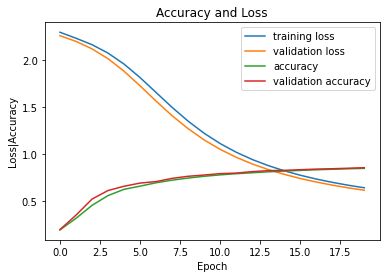

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(),
              metrics=['accuracy'])
# train model
H = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              verbose=1,
              validation_data=(X_test, y_test))
# visualize
plt.plot(np.arange(0, epoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, epoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, epoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, epoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()
plt.show()

In [ ]:
# giữ nguyên activation, learning rate, giảm số layer còn 1 layer với 128 nodes:
model = Sequential()
# input shape
model.add(Dense(128, activation='relu', input_shape=(784,)))
# model.add(Dense(32, activation='sigmoid'))
model.add(Dense(numOfClass, activation='softmax'))

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
399/399 [==============================] - 2s 5ms/step - loss: 1.3009 - accuracy: 0.6864 - val_loss: 0.7260 - val_accuracy: 0.8421
Epoch 2/20
399/399 [==============================] - 2s 4ms/step - loss: 0.6088 - accuracy: 0.8543 - val_loss: 0.4961 - val_accuracy: 0.8762
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4742 - accuracy: 0.8769 - val_loss: 0.4176 - val_accuracy: 0.8907
Epoch 4/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4160 - accuracy: 0.8881 - val_loss: 0.3771 - val_accuracy: 0.8985
Epoch 5/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3821 - accuracy: 0.8962 - val_loss: 0.3514 - val_accuracy: 0.9040
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3587 - accuracy: 0.9006 - val_loss: 0.3321 - val_accuracy: 0.9092
Epoch 7/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3407 - accuracy: 0.9047 - val_loss: 0.3173 - val_accuracy: 0.9120
Epoch 

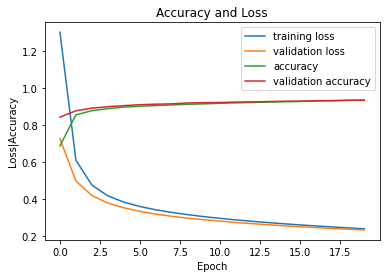

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(),
              metrics=['accuracy'])
# train model
H = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              verbose=1,
              validation_data=(X_test, y_test))
# visualize
plt.plot(np.arange(0, epoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, epoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, epoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, epoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()
plt.show()

In [ ]:
# giữ nguyên activation, learning rate, xóa hết hidden layer
model = Sequential()
# input shape
# model.add(Dense(512, activation='relu', input_shape=(784,)))
# model.add(Dense(32, activation='sigmoid'))
model.add(Dense(numOfClass, activation='softmax', input_shape=(784,)))

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
399/399 [==============================] - 1s 3ms/step - loss: 1.3453 - accuracy: 0.6807 - val_loss: 0.8713 - val_accuracy: 0.8248
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.7644 - accuracy: 0.8335 - val_loss: 0.6476 - val_accuracy: 0.8565
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 0.6229 - accuracy: 0.8531 - val_loss: 0.5569 - val_accuracy: 0.8696
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5547 - accuracy: 0.8635 - val_loss: 0.5059 - val_accuracy: 0.8771
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.5132 - accuracy: 0.8700 - val_loss: 0.4728 - val_accuracy: 0.8832
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4847 - accuracy: 0.8752 - val_loss: 0.4490 - val_accuracy: 0.8863
Epoch 7/20
399/399 [==============================] - 1s 2ms/step - loss: 0.4635 - accuracy: 0.8792 - val_loss: 0.4309 - val_accuracy: 0.8899
Epoch 

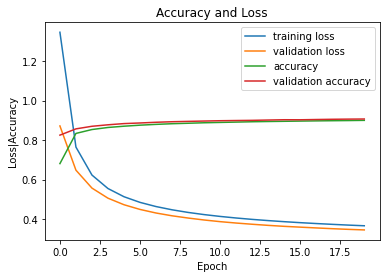

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(),
              metrics=['accuracy'])
# train model
H = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              verbose=1,
              validation_data=(X_test, y_test))
# visualize
plt.plot(np.arange(0, epoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, epoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, epoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, epoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()
plt.show()

In [ ]:
# model tăng thêm 1 hidden layer, tăng số node layer 3:
model = Sequential()
# input shape
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(numOfClass, activation='softmax', input_shape=(784,)))

model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_59 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_60 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_61 (Dense)             (None, 10)                650       
Total params: 698,058
Trainable params: 698,058
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
399/399 [==============================] - 7s 16ms/step - loss: 2.1205 - accuracy: 0.4953 - val_loss: 1.8516 - val_accuracy: 0.7044
Epoch 2/20
399/399 [==============================] - 6s 16ms/step - loss: 1.5122 - accuracy: 0.7259 - val_loss: 1.1701 - val_accuracy: 0.7768
Epoch 3/20
399/399 [==============================] - 6s 16ms/step - loss: 0.9828 - accuracy: 0.7959 - val_loss: 0.8076 - val_accuracy: 0.8331
Epoch 4/20
399/399 [==============================] - 6s 15ms/step - loss: 0.7296 - accuracy: 0.8383 - val_loss: 0.6353 - val_accuracy: 0.8567
Epoch 5/20
399/399 [==============================] - 6s 15ms/step - loss: 0.5996 - accuracy: 0.8593 - val_loss: 0.5369 - val_accuracy: 0.8754
Epoch 6/20
399/399 [==============================] - 6s 16ms/step - loss: 0.5203 - accuracy: 0.8729 - val_loss: 0.4732 - val_accuracy: 0.8848
Epoch 7/20
399/399 [==============================] - 6s 15ms/step - loss: 0.4665 - accuracy: 0.8830 - val_loss: 0.4292 - val_accuracy: 0.8937

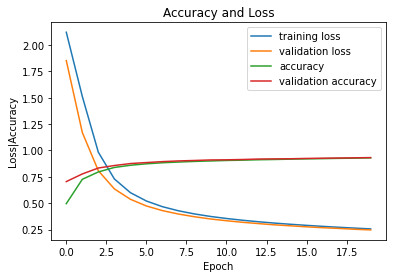

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(),
              metrics=['accuracy'])
# train model
H = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              verbose=1,
              validation_data=(X_test, y_test))
# visualize
plt.plot(np.arange(0, epoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, epoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, epoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, epoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()
plt.show()

3. Phân loại ảnh trong dữ liệu cifar10

In [ ]:
from keras.datasets import cifar10
# import data

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [ ]:
# nomalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = x_train.reshape(-1, 1024, 3)
x_test = x_test.reshape(-1, 1024, 3)
print(x_train.shape)

(50000, 1024, 3)


In [ ]:
# convert to gray
x_gray_train = tensorflow.image.rgb_to_grayscale(x_train)
x_gray_test = tensorflow.image.rgb_to_grayscale(x_test)
print(x_gray_train.shape)

(50000, 1024, 1)


In [ ]:
x_gray_train = np.array(x_gray_train).reshape(-1, 1024)
x_gray_test = np.array(x_gray_test).reshape(-1, 1024)

In [ ]:
# one-hot encoding
print(y_train[0])
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
model2 = Sequential()
model2.add(Dense(512, activation='relu', input_shape=(1024, )))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_172 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_173 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_174 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_175 (Dense)            (None, 10)              

In [ ]:
Epoch = 40
model2.compile(loss='categorical_crossentropy',
               optimizer=SGD(learning_rate=0.1),
               metrics=['accuracy'])
H2 = model2.fit(x_gray_train, y_train,
                batch_size=128,
                epochs=Epoch,
                verbose=1,
                validation_data=(x_gray_test, y_test))

Epoch 1/40
391/391 [==============================] - 7s 16ms/step - loss: 2.1176 - accuracy: 0.2220 - val_loss: 1.9905 - val_accuracy: 0.2898
Epoch 2/40
391/391 [==============================] - 6s 16ms/step - loss: 1.9977 - accuracy: 0.2823 - val_loss: 1.9169 - val_accuracy: 0.3202
Epoch 3/40
391/391 [==============================] - 6s 16ms/step - loss: 1.9325 - accuracy: 0.3089 - val_loss: 1.8935 - val_accuracy: 0.3329
Epoch 4/40
391/391 [==============================] - 6s 16ms/step - loss: 1.8895 - accuracy: 0.3242 - val_loss: 1.8195 - val_accuracy: 0.3563
Epoch 5/40
391/391 [==============================] - 6s 16ms/step - loss: 1.8583 - accuracy: 0.3380 - val_loss: 1.8333 - val_accuracy: 0.3501
Epoch 6/40
391/391 [==============================] - 6s 16ms/step - loss: 1.8279 - accuracy: 0.3483 - val_loss: 1.7746 - val_accuracy: 0.3627
Epoch 7/40
391/391 [==============================] - 6s 16ms/step - loss: 1.8001 - accuracy: 0.3585 - val_loss: 1.7465 - val_accuracy: 0.3806

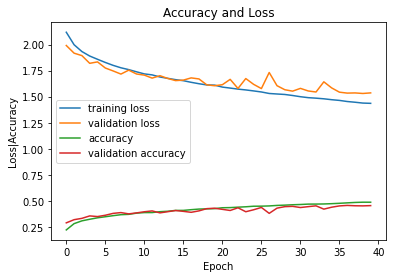

In [ ]:
# visualize
plt.plot(np.arange(0, Epoch), H2.history['loss'], label='training loss')
plt.plot(np.arange(0, Epoch), H2.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, Epoch), H2.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, Epoch), H2.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()
plt.show()

4. [Optional] Code feedforward bằng numpy và kiểm tra tính chính xác của hàm bằng model tương ứng keras, có thể khởi tạo weight, bias trong layer bằng 1 trong keras, rồi so sánh với code mình implement xem output giống nhau không?

$$
Z^{(1)} = X*W^{(1)} + (b^{(1)})^T\\
A^{(1)} = \sigma(Z^{(1)})\\
Z^{(2)} = A^{(1)}*W^{(2)} + (b^{(2)})^T\\
A^{(2)} = \sigma(Z^{(2)})\\
Z^{(3)} = A^{(2)}*W^{(3)} + (b^{(3)})^T\\
\hat Y = A^{(3)} =\sigma(Z^{(3)}) 
$$

In [23]:
# code bằng keras:
from keras.datasets import mnist
import keras
import tensorflow as tf
from keras.layers import Dense
from tensorflow.keras.models import Sequential
import numpy as np

In [44]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [45]:
# convert, nomalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# reshape
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [46]:
print(x_train.shape)

(60000, 784)


In [47]:
# one-hot encoding labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [31]:
# model
model = Sequential()
weight_1 = np.ones((784, 512), dtype='float32')
model.add(Dense(512, activation='relu', input_shape=(28*28, ), kernel_initializer=keras.initializers.Constant(weight_1)))
weight_2 = np.ones((512, 128), dtype='float32')
model.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.Constant(weight_2)))
weight_3 = np.ones((128, 10), dtype='float32')
model.add(Dense(10, activation='softmax', kernel_initializer=keras.initializers.Constant(weight_3)))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [32]:
from tensorflow.keras.optimizers import SGD

In [33]:
# training model
Epoch = 20
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])
H = model.fit(x_train, y_train,
              batch_size=128,
              verbose=1,
              epochs=Epoch,
              validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 4s 9ms/step - loss: 413765.0312 - accuracy: 0.1121 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
E

In [124]:
# code feedforward bằng numpy:
for i in range(0, 200//128 + 1):
    X = x_train[i*128:i*128+128] # batch_size = 128 (128x784 784x512)
    b_1 = np.ones(512)
    Z_1 = np.dot(X, weight_1) + b_1 # Z(1) = X*W(1) + b(1)
    A_1 = np.where(Z_1 > 0, Z_1, 0) # A(1) = sigma(Z(1))
    b_2 = np.ones(128)
    Z_2 = np.dot(A_1, weight_2) + b_2 # Z(2) = A(1)*W(2) + b(2)
    A_2 = np.where(Z_2 > 0, Z_2, 0)
    b_3 = np.ones(10)
    Z_3 = np.dot(A_2, weight_3) + b_3
    print(Z_3[0])
    A_3 = np.power(np.e, Z_3[0]) / (np.sum(np.power(np.e, Z_3[0])))
    # # A_3 = A_3 / (np.sum(A_3))
    # print(A_3)



[7139698. 7139698. 7139698. 7139698. 7139698. 7139698. 7139698. 7139698.
 7139698. 7139698.]
[5195206.5 5195206.5 5195206.5 5195206.5 5195206.5 5195206.5 5195206.5
 5195206.5 5195206.5 5195206.5]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in power
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [105]:
a = np.array([[-1, 2],
             [3, 2]])
a = np.where(a > 0, a, 0)
print(a)

[[0 2]
 [3 2]]
